- 1. Importing Libraries and Dataset

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pgeocode 
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
## Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix,precision_score,jaccard_score,recall_score,f1_score


In [3]:
df = pd.DataFrame(pd.read_csv("Bank_Loan.csv"))

In [4]:
df.head(5)

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
df.tail(5)

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  \
4995  4996   29           3      40     92697       1  1/90          3   
4996  4997   30           4      15     92037       4  0/40          1   
4997  4998   63          39      24     93023       2  0/30          3   
4998  4999   65          40      49     90034       3  0/50          2   
4999  5000   28           4      83     92612       3  0/80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [6]:
df.shape

(5000, 14)

- This dataset has 5000 rows and 14 columns

In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## Features
Above are all the column names:
ID : customer ID
Age : age of customer
Experience : the number of years that customer has experience
Income : the customer's annual earnings in Thousdands(k)
ZIP Code : the postal code of customer's location
Family : the number of people in customer's family
CCAvg : the average of monthly credit card spending
Education : the level of customer's                                           Education(undergraduate,graguate,professional)
Mortgage : the Value of customer's mortgage(thing that                     the customer uses it as a guarantee to the bank)
Securities Account : the customer has a security account or                 not(it's also known as an investment account)
CD Account : the customer has a CD account or not(a type of            savings account that lets the customer earn interest on a 
     fixed amount of money for a fixed period of time)
Online : the customer uses the bank's online services or not
CreditCard : the customer uses the bank's credit card or not

## Target - Personal Loan : The Customer is granted loans or not

- 2. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [9]:
df.sum().isna()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

- There are no missing values

- To convert object column to numeric

In [10]:
# Convert the 'CCAvg' column to string type
df['CCAvg'] = df['CCAvg'].astype(str)

# Replace forward slashes with periods in the 'CCAvg' column
df['CCAvg'] = df['CCAvg'].str.replace("/", ".")

# Convert the modified 'CCAvg' column to floating-point data type
df['CCAvg'] = df['CCAvg'].astype(np.float64)

In [11]:
df.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [14]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

- Experiance cant be negative, and must be corrected

In [15]:
df['Experience'] = df['Experience'].abs()
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.134600    73.774200  93152.503000   
std    1443.520003    11.463166    11.415189    46.033729   2121.852197   
min       1.000000    23.000000     0.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

- Income is "anual" and ccAvg is monthly, hency converting income to monthly

In [16]:
df['Income'] = df['Income']/12
df

ID  Age  Experience    Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1  4.083333     91107       4    1.6          1   
1        2   45          19  2.833333     90089       3    1.5          1   
2        3   39          15  0.916667     94720       1    1.0          1   
3        4   35           9  8.333333     94112       1    2.7          2   
4        5   35           8  3.750000     91330       4    1.0          2   
...    ...  ...         ...       ...       ...     ...    ...        ...   
4995  4996   29           3  3.333333     92697       1    1.9          3   
4996  4997   30           4  1.250000     92037       4    0.4          1   
4997  4998   63          39  2.000000     93023       2    0.3          3   
4998  4999   65          40  4.083333     90034       3    0.5          2   
4999  5000   28           4  6.916667     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [17]:
df.head(5)

ID  Age  Experience    Income  ZIP Code  Family  CCAvg  Education  \
0   1   25           1  4.083333     91107       4    1.6          1   
1   2   45          19  2.833333     90089       3    1.5          1   
2   3   39          15  0.916667     94720       1    1.0          1   
3   4   35           9  8.333333     94112       1    2.7          2   
4   5   35           8  3.750000     91330       4    1.0          2   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard  
0         0              0                   1           0       0           0  
1         0              0                   1           0       0           0  
2         0              0                   0           0       0           0  
3         0              0                   0           0       0           0  
4         0              0                   0           0       0           1

- The Target Overview

In [18]:
print('number of customers : ',df.shape[0])
print('The number of Personal Loan = 0 : ',df['Personal Loan'].value_counts()[0])
print('The number of Personal Loan = 1 : ',df['Personal Loan'].value_counts()[1])

number of customers :  5000
The number of Personal Loan = 0 :  4520
The number of Personal Loan = 1 :  480


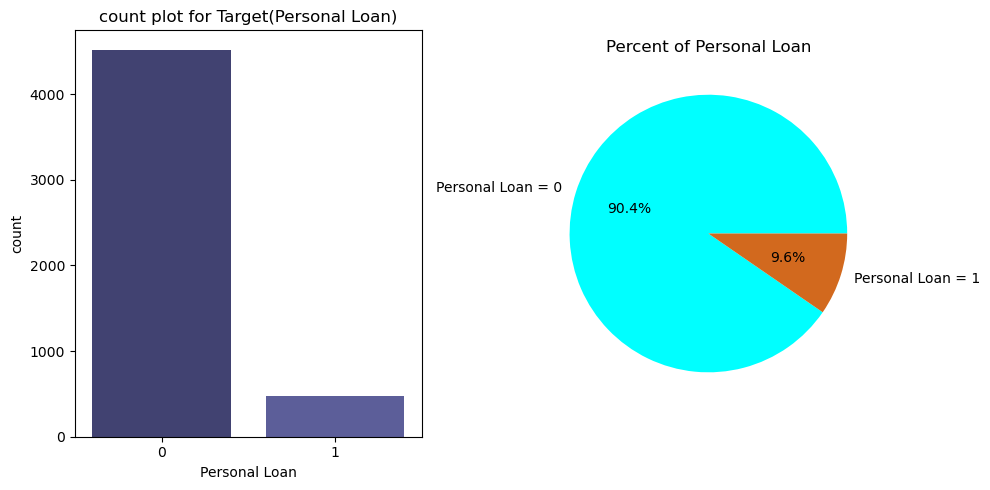

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Personal Loan',palette = "tab20b")
plt.title("count plot for Target(Personal Loan)")
plt.subplot(1,2,2)
plt.pie([df['Personal Loan'].value_counts()[0],df['Personal Loan'].value_counts()[1]],
        labels=['Personal Loan = 0','Personal Loan = 1'],autopct='%1.1f%%',colors=['cyan','chocolate'])
plt.title("Percent of Personal Loan")
plt.tight_layout()
plt.show()

In [20]:
descrete_col = df[['Family','Education','Securities Account','CD Account','Online','CreditCard']]
continuous_col = df[['Age','Experience','Income','CCAvg','Mortgage']]

Family :  [4 3 1 2]
Education :  [1 2 3]
Securities Account :  [1 0]
CD Account :  [0 1]
Online :  [0 1]
CreditCard :  [0 1]


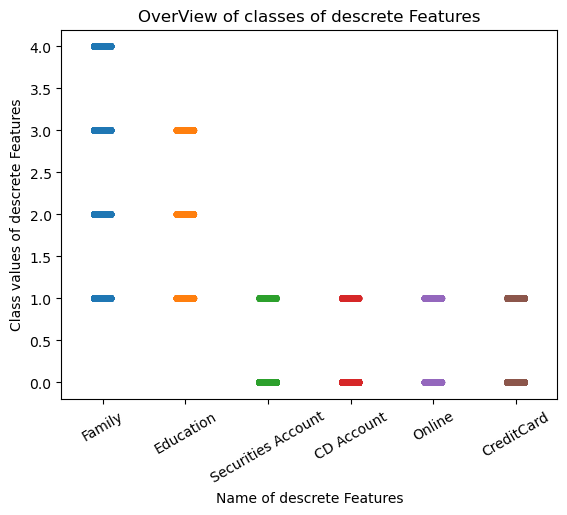

In [21]:
for col in descrete_col :
    print('%s : ' %col , df[col].unique())
    
ax = sns.stripplot(data=descrete_col)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylabel('Class values of descrete Features')
plt.xlabel('Name of descrete Features')
plt.title('OverView of classes of descrete Features')
plt.show()

### As shown above there are 7 features which are descrete
    - Family is a multinomial feature and it can be included 1 person at least and 4 persons at most : [1,2,3,4]
    - Education is another multinomial feature and it can be in 3 levels : [1,2,3]
    - the rest 4 features are binary features and are 0/1 means No/Yes

count       mean         std        min    25%        50%  \
Age         5000.0  45.338400   11.463166  23.000000  35.00  45.000000   
Experience  5000.0  20.134600   11.415189   0.000000  10.00  20.000000   
Income      5000.0   6.147850    3.836144   0.666667   3.25   5.333333   
CCAvg       5000.0   1.937938    1.747659   0.000000   0.70   1.500000   
Mortgage    5000.0  56.498800  101.713802   0.000000   0.00   0.000000   

                   75%         max  
Age          55.000000   67.000000  
Experience   30.000000   43.000000  
Income        8.166667   18.666667  
CCAvg         2.500000   10.000000  
Mortgage    101.000000  635.000000

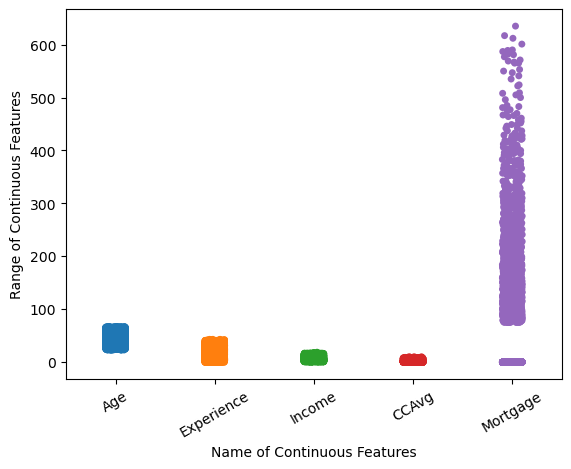

In [22]:
display(continuous_col.describe().T)
ax = sns.stripplot(data=continuous_col)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylabel('Range of Continuous Features')
plt.xlabel('Name of Continuous Features')
plt.show()

#### As shown and described here there are 5 continuous features 
    - Age of customers is in range(23-67)
    - Customers have experience at most 43 years
    - Income is in range (0.67-18.66) monthly
    - CCAvg value is 10 in maximum
    - as seen above there are not Mortgage between 0 and 75, its values are 0 or in range(75,635), also we can see the most values are in range(75,400) 

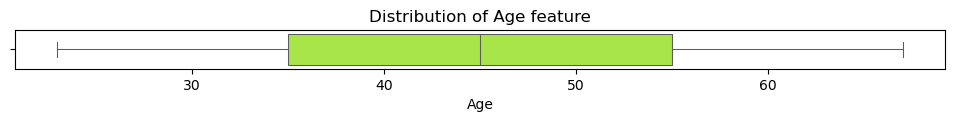

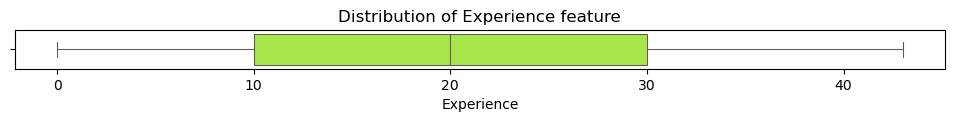

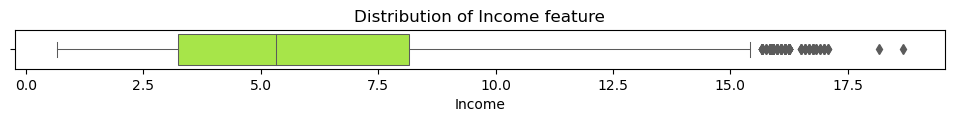

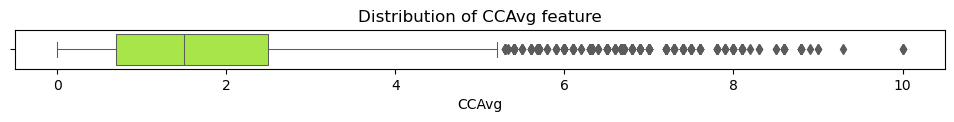

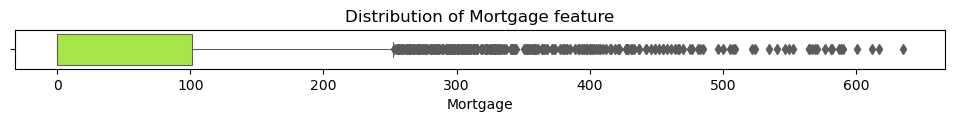

In [23]:
for col in continuous_col.columns:
    plt.figure(figsize=(12,0.5))
    ax = sns.boxplot(x=df[col],color="greenyellow", linewidth=.75)
    ax.set_title(f'Distribution of {col} feature')
    plt.show()

    - As shown in these box plots, in two features, Age and Experience, the distribution of data is normal; in other features, we see some out-of-range points. Because they are about the amount of money or the value of a mortgage, they can be any amount, and all of them are reasonable, so they can't be noises.

## Remove the noise
    - As mentioned above, the ZIP Code column doesn't have a significant effect on determining Personal Loan 
    and we can remove it from our dataset for modeling, but we need it for visualization and extracting some information. So, we create a copy of the final clean dataset (df) named df1, remove the noise from it, and insert important columns (like latitude, longitude, and so on) into it. Finally, we remove the ZIP Code column from clean data (df) for our modeling.
    
## df is final clean datam

In [24]:
## df1 is just for visualizations related to zipcodes
df1 = df.copy()
df = df.drop(['ZIP Code'],axis=1)
df1.drop(index=384,inplace=True)
df1.reset_index(drop=True, inplace =True)
df1

ID  Age  Experience    Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1  4.083333     91107       4    1.6          1   
1        2   45          19  2.833333     90089       3    1.5          1   
2        3   39          15  0.916667     94720       1    1.0          1   
3        4   35           9  8.333333     94112       1    2.7          2   
4        5   35           8  3.750000     91330       4    1.0          2   
...    ...  ...         ...       ...       ...     ...    ...        ...   
4994  4996   29           3  3.333333     92697       1    1.9          3   
4995  4997   30           4  1.250000     92037       4    0.4          1   
4996  4998   63          39  2.000000     93023       2    0.3          3   
4997  4999   65          40  4.083333     90034       3    0.5          2   
4998  5000   28           4  6.916667     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4994         0              0                   0           0       1   
4995        85              0                   0           0       1   
4996         0              0                   0           0       0   
4997         0              0                   0           0       1   
4998         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4994           0  
4995           0  
4996           0  
4997           0  
4998           1  

[4999 rows x 14 columns]

### Insert Latitude, Longitude, County and Place name to df1 according to zipcode

In [25]:
nomi = pgeocode.Nominatim('us')
df2 = []
df3 = []
df4 = []
df5 = []

for zipCode in df1['ZIP Code'] :
    a = nomi.query_postal_code(zipCode)
    df2.append(a['latitude'])
    df3.append(a['longitude'])
    df4.append(a['county_name'])
    df5.append(a['place_name'])
    
df1['Lat'] = pd.DataFrame(df2)
df1['Lon'] = pd.DataFrame(df3)
df1['County'] = pd.DataFrame(df4)
df1['Place'] = pd.DataFrame(df5)
df1

ID  Age  Experience    Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1  4.083333     91107       4    1.6          1   
1        2   45          19  2.833333     90089       3    1.5          1   
2        3   39          15  0.916667     94720       1    1.0          1   
3        4   35           9  8.333333     94112       1    2.7          2   
4        5   35           8  3.750000     91330       4    1.0          2   
...    ...  ...         ...       ...       ...     ...    ...        ...   
4994  4996   29           3  3.333333     92697       1    1.9          3   
4995  4997   30           4  1.250000     92037       4    0.4          1   
4996  4998   63          39  2.000000     93023       2    0.3          3   
4997  4999   65          40  4.083333     90034       3    0.5          2   
4998  5000   28           4  6.916667     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4994         0              0                   0           0       1   
4995        85              0                   0           0       1   
4996         0              0                   0           0       0   
4997         0              0                   0           0       1   
4998         0              0                   0           0       1   

      CreditCard      Lat       Lon                            County  \
0              0  34.1510 -118.0889                       Los Angeles   
1              0  33.7866 -118.2987                       Los Angeles   
2              0  37.8738 -122.2549                           Alameda   
3              0  37.7195 -122.4411  City and County of San Francisco   
4              1  34.2283 -118.5368                       Los Angeles   
...          ...      ...       ...                               ...   
4994           0  33.6485 -117.8387                            Orange   
4995           0  32.8455 -117.2521                         San Diego   
4996           0  34.4451 -119.2565                           Ventura   
4997           0  34.0290 -118.4005                       Los Angeles   
4998           1  33.6607 -117.8264                            Orange   

              Place  
0          Pasadena  
1       Los Angeles  
2          Berkeley  
3     San Francisco  
4        Northridge  
...             ...  
4994         Irvine  
4995       La Jolla  
4996           Ojai  
4997    Los Angeles  
4998         Irvine  

[4999 rows x 18 columns]

In [26]:
df1.describe(include='all')

ID          Age   Experience       Income      ZIP Code  \
count   4999.000000  4999.000000  4999.000000  4999.000000   4999.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean    2500.923185    45.337267    20.133627     6.148730  93169.275455   
std     1443.354188    11.464033    11.416124     3.836023   1759.630610   
min        1.000000    23.000000     0.000000     0.666667  90005.000000   
25%     1251.500000    35.000000    10.000000     3.250000  91911.000000   
50%     2501.000000    45.000000    20.000000     5.333333  93437.000000   
75%     3750.500000    55.000000    30.000000     8.166667  94608.000000   
max     5000.000000    67.000000    43.000000    18.666667  96651.000000   

             Family        CCAvg    Education     Mortgage  Personal Loan  \
count   4999.000000  4999.000000  4999.000000  4999.000000    4999.000000   
unique          NaN          NaN          NaN          NaN            NaN   
top             NaN          NaN          NaN          NaN            NaN   
freq            NaN          NaN          NaN          NaN            NaN   
mean       2.396079     1.938206     1.880776    56.510102       0.096019   
std        1.147554     1.747731     0.839804   101.720837       0.294647   
min        1.000000     0.000000     1.000000     0.000000       0.000000   
25%        1.000000     0.700000     1.000000     0.000000       0.000000   
50%        2.000000     1.500000     2.000000     0.000000       0.000000   
75%        3.000000     2.500000     3.000000   101.000000       0.000000   
max        4.000000    10.000000     3.000000   635.000000       1.000000   

        Securities Account   CD Account       Online   CreditCard  \
count          4999.000000  4999.000000  4999.000000  4999.000000   
unique                 NaN          NaN          NaN          NaN   
top                    NaN          NaN          NaN          NaN   
freq                   NaN          NaN          NaN          NaN   
mean              0.104421     0.060412     0.596719     0.293859   
std               0.305836     0.238273     0.490605     0.455574   
min               0.000000     0.000000     0.000000     0.000000   
25%               0.000000     0.000000     0.000000     0.000000   
50%               0.000000     0.000000     1.000000     0.000000   
75%               0.000000     0.000000     1.000000     1.000000   
max               1.000000     1.000000     1.000000     1.000000   

                Lat          Lon       County        Place  
count   4959.000000  4959.000000         4959         4959  
unique          NaN          NaN           38          244  
top             NaN          NaN  Los Angeles  Los Angeles  
freq            NaN          NaN         1095          375  
mean      35.786663  -120.038983          NaN          NaN  
std        2.105600     2.090673          NaN          NaN  
min       32.562600  -124.159300          NaN          NaN  
25%       33.953300  -122.138800          NaN          NaN  
50%       35.385500  -119.861200          NaN          NaN  
75%       37.750900  -118.085700          NaN          NaN  
max       41.724300  -115.573000          NaN          NaN

In [27]:
df1[df1['Lat'].isna()]['ZIP Code'].unique()

array([92717, 92634, 96651, 92709])

In [28]:
miss_zipcodes = [92717,92634,92709]
miss_zipcodes_info = [[33.6462,-117.8397,'Orange','Irvine'],[33.8739,-117.9028,'Orange','Fullerton']
                      ,[33.67,-117.73,'Orange','Irvine']]

for i,zcode in enumerate(miss_zipcodes) :
    for j,info in enumerate(['Lat','Lon','County','Place']) :
        df1.loc[df1['ZIP Code']==zcode,info]=miss_zipcodes_info[i][j]

   - We can just find information of 3 unknown zipcodes by searching on the internet and replacing information of them. So we remove the rest of the missing zipcodes(zipcode=96651). 
    - As seen before on the strip plot of the ZIP Code vs. Personal Loan, we annotated that 'zip codes 96561 must be checked', and as we see here, zipcodes 96651 are unknown and finally removed.

In [29]:
df1.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Lat                   6
Lon                   6
County                6
Place                 6
dtype: int64

    - These 6 missing values are information of unkmown zipcode 96651. 

In [30]:
df1 = df1.dropna()
display(df1.isna().sum())
display(df)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Lat                   0
Lon                   0
County                0
Place                 0
dtype: int64

ID  Age  Experience    Income  Family  CCAvg  Education  Mortgage  \
0        1   25           1  4.083333       4    1.6          1         0   
1        2   45          19  2.833333       3    1.5          1         0   
2        3   39          15  0.916667       1    1.0          1         0   
3        4   35           9  8.333333       1    2.7          2         0   
4        5   35           8  3.750000       4    1.0          2         0   
...    ...  ...         ...       ...     ...    ...        ...       ...   
4995  4996   29           3  3.333333       1    1.9          3         0   
4996  4997   30           4  1.250000       4    0.4          1        85   
4997  4998   63          39  2.000000       2    0.3          3         0   
4998  4999   65          40  4.083333       3    0.5          2         0   
4999  5000   28           4  6.916667       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

# The Dataset is cleaned 

In [31]:
fig = px.strip(df1,
         x="Personal Loan",
         y="ZIP Code",
         stripmode='overlay')
fig.update_layout(annotations=[
        dict(
            x=0,
            y=96900,
            text="ZIP Codes 96651 have been removed as unknown zipcodes",
            textangle=0,
            ax=150,
            ay=-50,
            font=dict(
                color="red",
                size=14
            ),
            arrowcolor="red",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1)])
       
fig.show()

### 3. Data Analysis and visualization

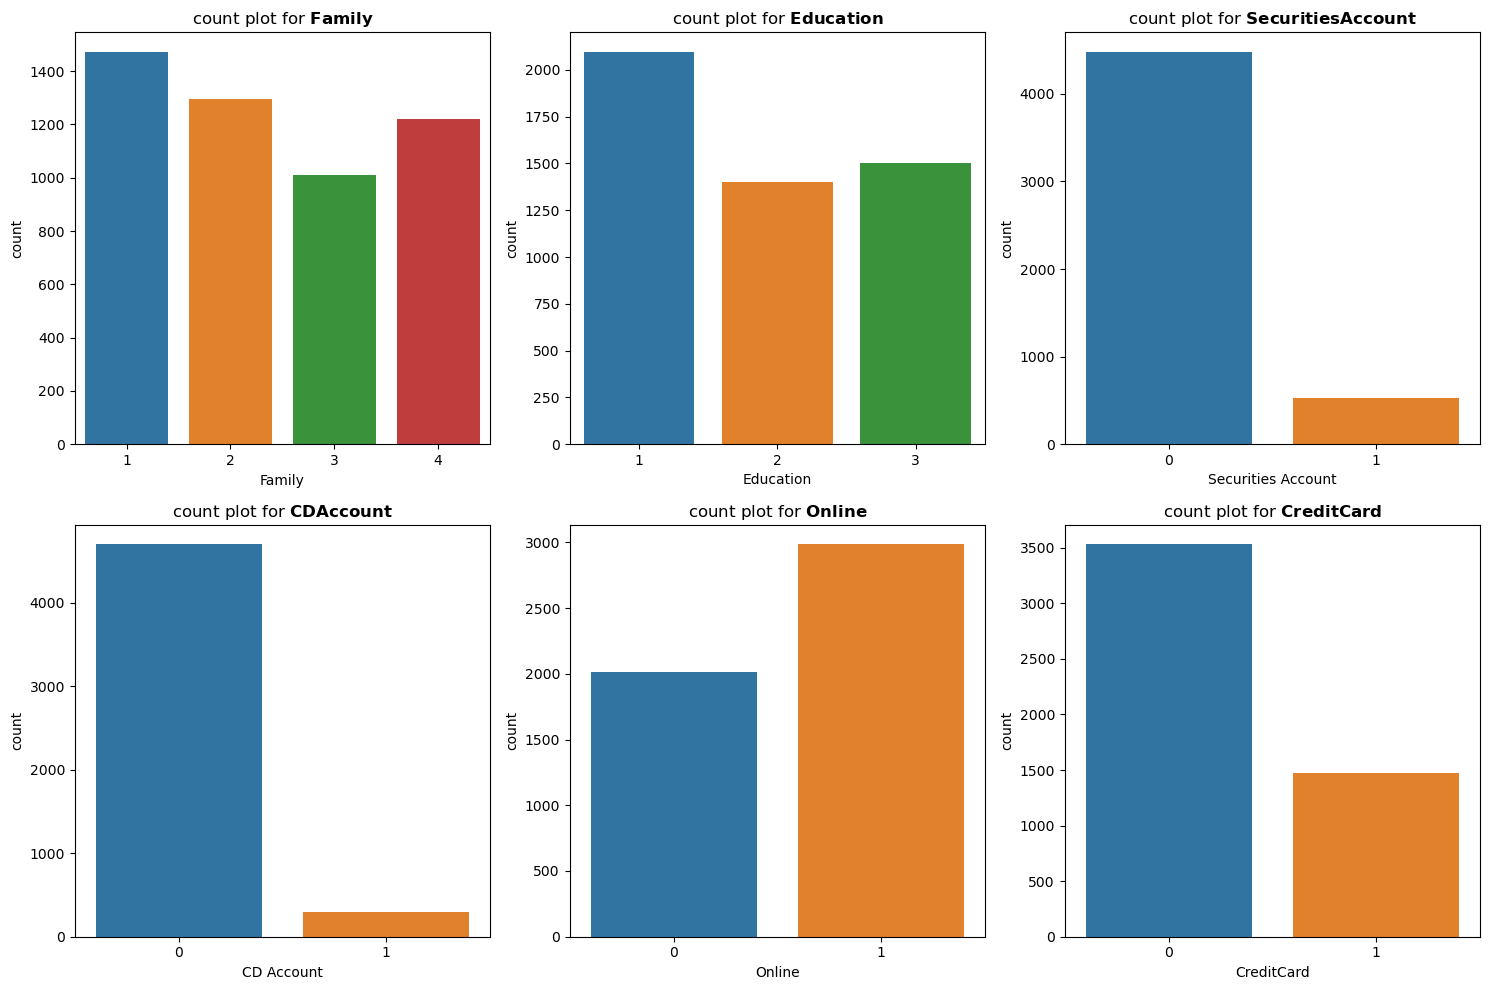

************************************************************************************************************************
Descrete columns name : 
 ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Descrete columns categories : 
 [[4, 3, 1, 2], [1, 2, 3], [1, 0], [0, 1], [0, 1], [0, 1]]
Descrete columns categories count : 
 [[1222, 1010, 1472, 1296], [2096, 1403, 1501], [522, 4478], [4698, 302], [2016, 2984], [3530, 1470]]


************************************************************************************************************************


In [32]:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(descrete_col.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col)
    plt.title(f"count plot for $\\mathbf{{{col}}}$")
plt.tight_layout()
plt.show()
#############################################################
descrete_cols_categories=[]
descrete_cols_categories_count=[]

for col in list(descrete_col.columns):
    pie_name1=[]
    pie_value1=[]
    for j in range(len(descrete_col[col].unique())) :
        pie_name1.append(descrete_col[col].unique()[j])
        pie_value1.append(descrete_col[descrete_col[col]==pie_name1[j]][col].count())
    descrete_cols_categories.append(pie_name1)
    descrete_cols_categories_count.append(pie_value1)

print('*'*120)
print('Descrete columns name : \n' , list(descrete_col.columns))
print('Descrete columns categories : \n' , descrete_cols_categories)   
print('Descrete columns categories count : \n' , descrete_cols_categories_count)
print('\n')
print('*'*120)
#############################################################
rows = 3
cols = 2

# Create subplots
fig = make_subplots(rows=rows, cols=cols, specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}],
                                           [{"type": "pie"}, {"type": "pie"}]])


for i in range(rows * cols) :
    fig.add_trace(go.Pie(labels=descrete_cols_categories[i], values=descrete_cols_categories_count[i], name=descrete_col.columns[i]),
                  row=int(np.ceil((i+1)/2)), col=(i%2)+1)


fig.update_layout(margin=dict(t=35, b=35, l=35, r=35))
fig.update(layout_title_text='Percent Of values in descrete columns',
           layout_showlegend=True)

fig = go.Figure(fig)
fig.show()

### these charts show the count and percent of descrete columns' values
     You can see each descrete column name, its categories, number, and percent of customers in any category by putting up your mouse cursor at each part of any pie chart.
    - in the number of customers' families, customers with 1 person family have the most number of customers(29.4% of all customers) and with 3 persons family has the lowest number of them(20.2% of all customers).
    - in the customers' education, most customers are undergraduate(41.9%).
    - Most customers don't have Securities Account(89.6%)
    - Just a few customers have CD Account and most of them don't have
    - More than half of customers use Online services(59.7%)
    - Just 29.4% of customers use credit card and most of them don't use

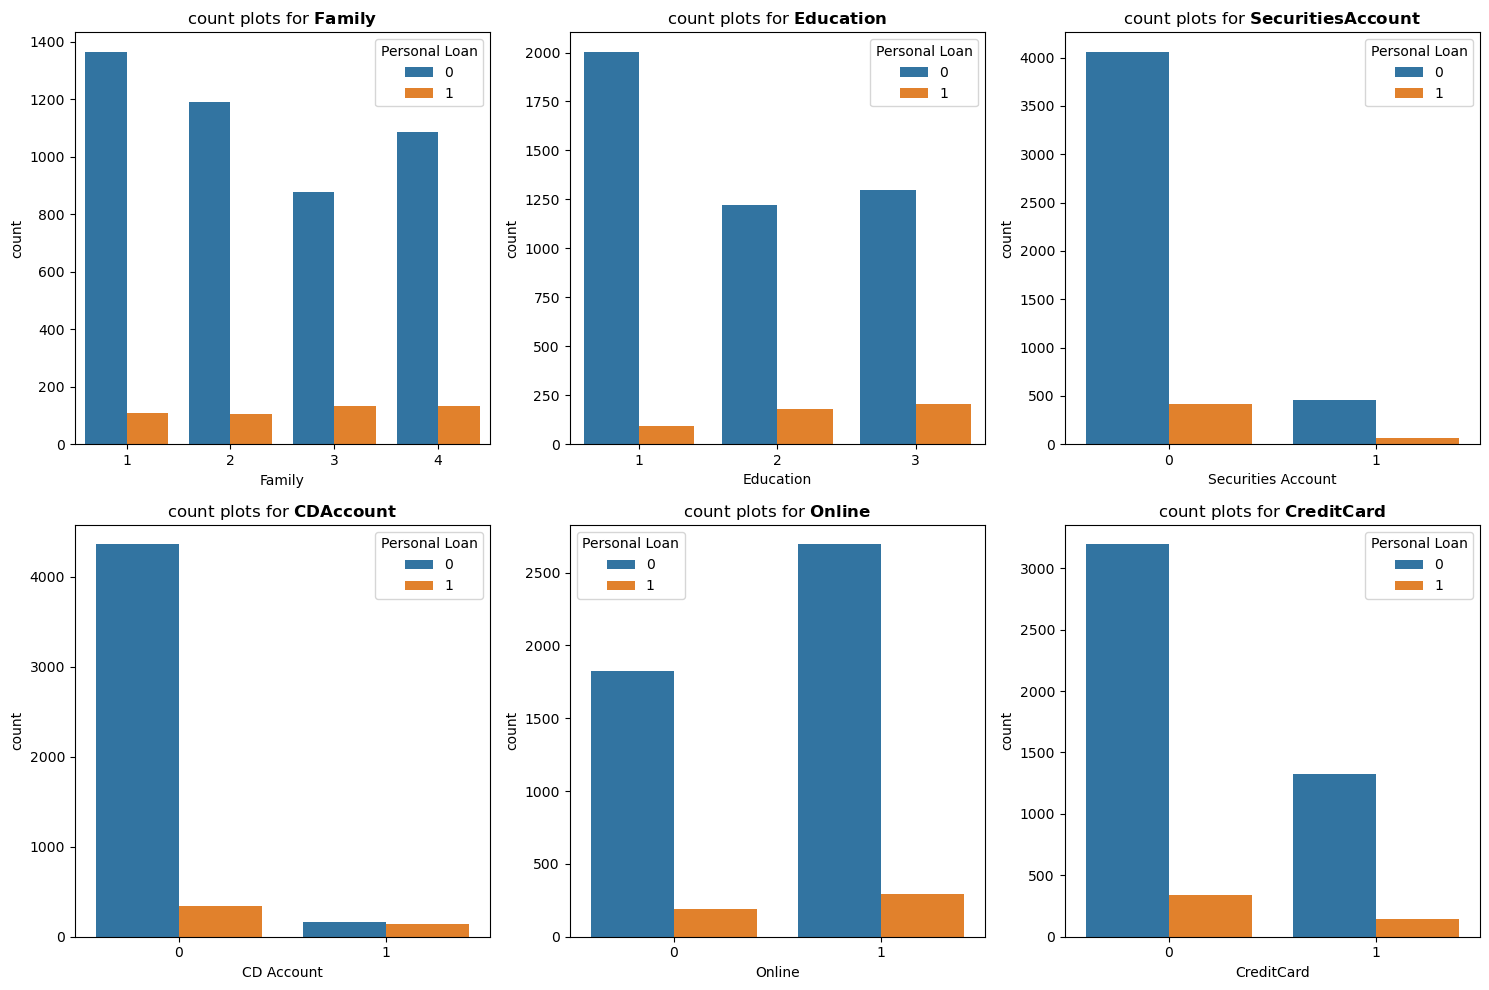

In [33]:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(descrete_col.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col,hue='Personal Loan')
    plt.title(f"count plots for $\\mathbf{{{col}}}$")
plt.tight_layout()
plt.show()

### These plots show counts of customers who were granted loans based descrete features.
    - As seen above, most customers are with 1 person families, but 3 and 4 person families are granted loans more than others.
    - The education of most customers is undergraduate, but graduate and professional customers are granted loans more than others.
    - Most customers who were granted loans didn't have a securities account, which highlights the importance of different features in increasing the chance of being granted loans.
    - Also, Most customers who were granted loans didn't have a CD Accounts.
    - Most customers who were granted loans didn't use a Credit Card.
    - Most customers who were granted loans used Online services.
    
 ### One important factor in data analizing is ratio of target on each category of each column
 #### Note : ratio = (number of customers with personal loan = 1 in each category)/(number of all customers in that category)
    - In the CD account feature, the ratio of customers who had CD accounts and were granted loans is 46.36%. Also, the ratio of customers who didn't have CD accounts and were granted loans is 7.2%. So, we conclude that having CD accounts increases the chance of being granted loans.
    - In Securities account, online, and CreditCard columns, these two ratios are almost close together, which means the importance of other features in increasing the chance of being granted loans besides these feature.

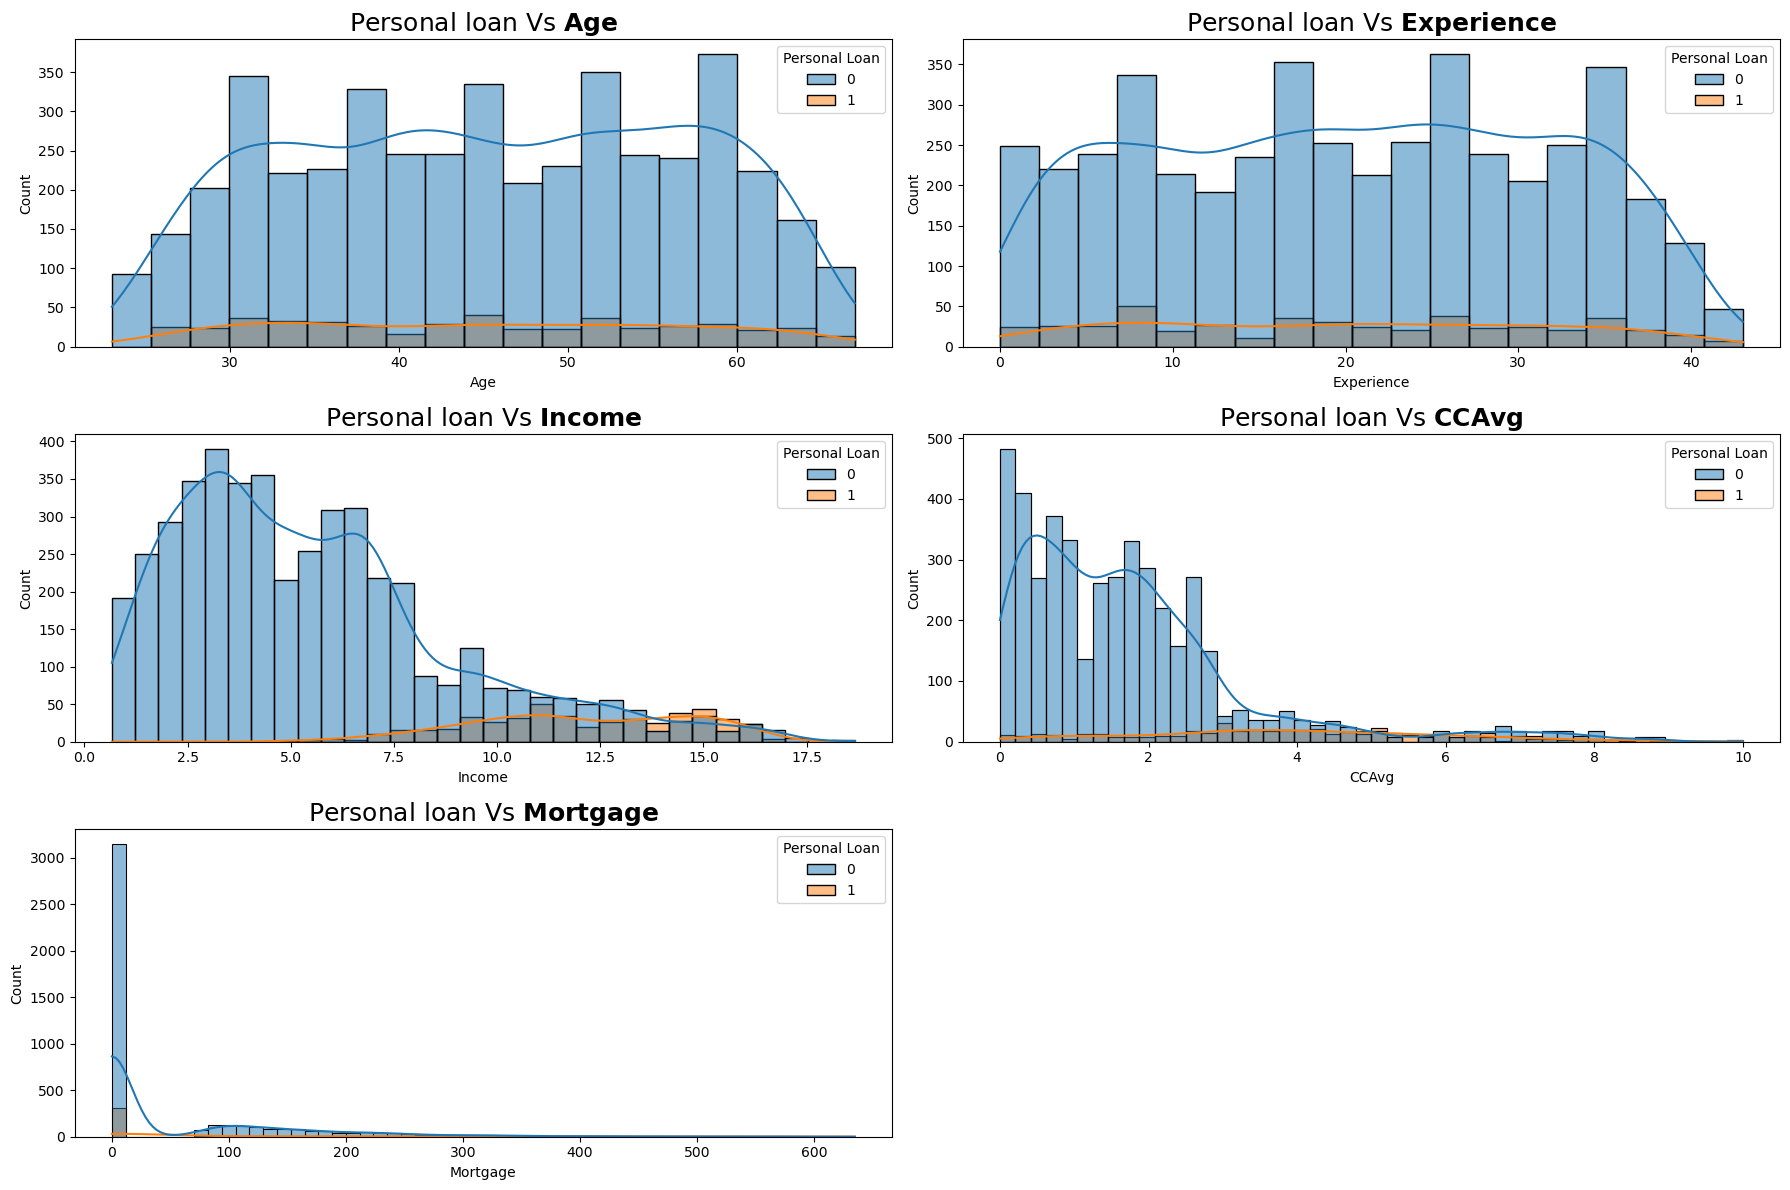



************************************************************************************************************************


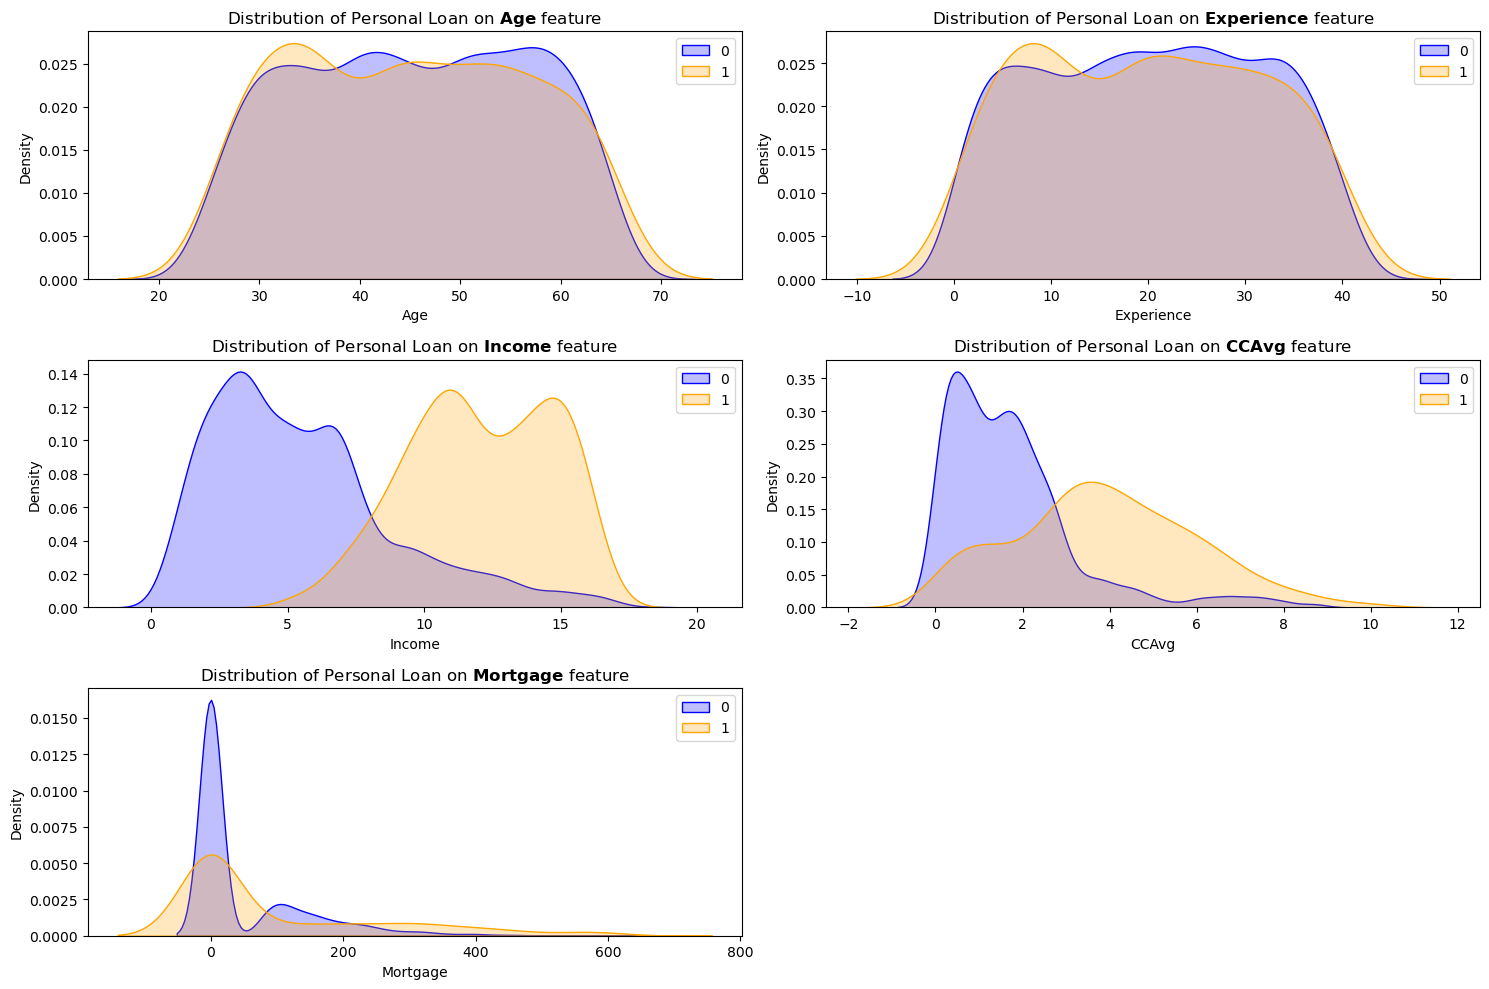

In [34]:
plt.figure(figsize=(18,12))
for i,col in enumerate(continuous_col.columns):
    plt.subplot(3,2,i+1)
    sns.histplot(x=df[col],hue = df['Personal Loan'],kde=True)
    plt.title(f"Personal loan Vs $\\mathbf{{{col}}}$",fontsize=18)

plt.tight_layout()
plt.show()

#############################################################################
print('\n')
print('*'*120)

plt.figure(figsize=(15,10))
for i,col in enumerate(continuous_col.columns):
    plt.subplot(3,2,i+1)
    color=['blue','orange']
    for j in list(df['Personal Loan'].unique()) :
        sns.kdeplot(df[df['Personal Loan']==j][col],color=color[j],fill=True,label=j)
        plt.legend()
    plt.title(f"Distribution of Personal Loan on $\\mathbf{{{col}}}$ feature")
plt.tight_layout()
plt.show()

### These plots show the number and distribution of customers by continuous features
    - The Age of customers who were granted loans are (26-65).
    - The plot of Experience shows that customers with any amount of experience can be granted loans and it means the importance of other different features besides this feature.
    - the range of Income for customers who were granted loans is (5-17.5), most customers who received loans have income in the range(7.5-16.5).
    - kde plot of income clearly shows that the chance of being granted loans increases by rising the income.  
    - Most Customers have CCAvge <=3(about 83% of all customers) that among these customers 95.98% who were not granted loans and 4.02% were granted, also fewer customers have CCAvg >3(about 17% of all customers) that among them 36.87% who were granted loans and 63.13% were not granted. So, these percents show that the large values of CCAvg increase the chance of being granted loans.
    - Most customers don't have any mortgage (Mortgage=0).

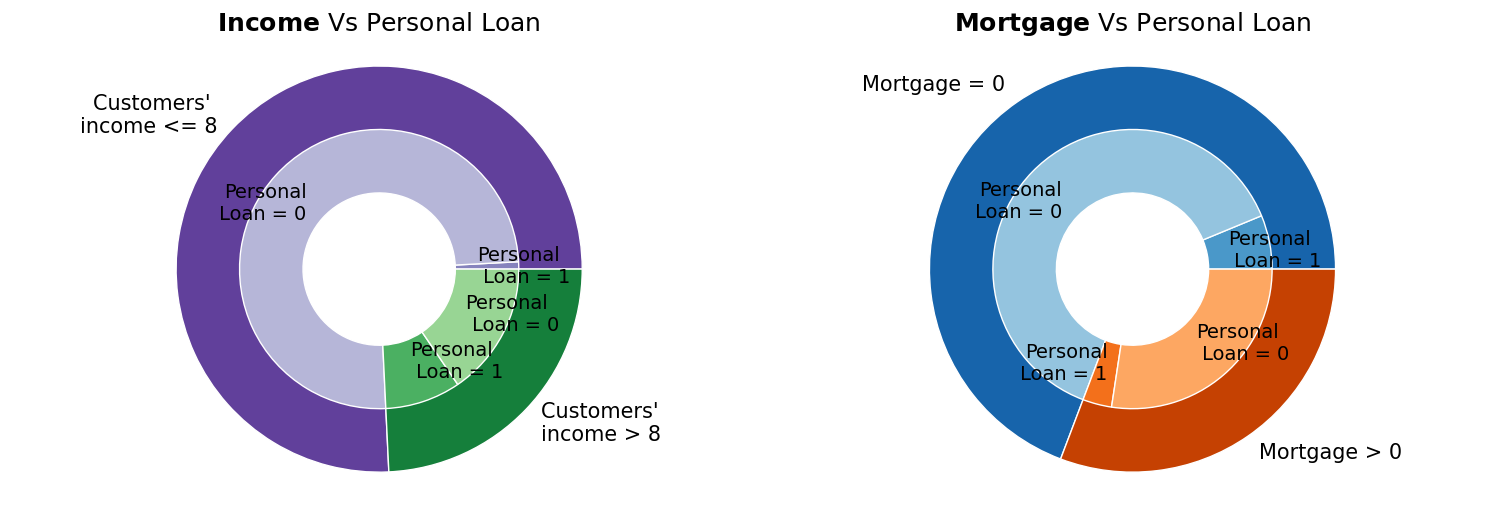



************************************************************************************************************************


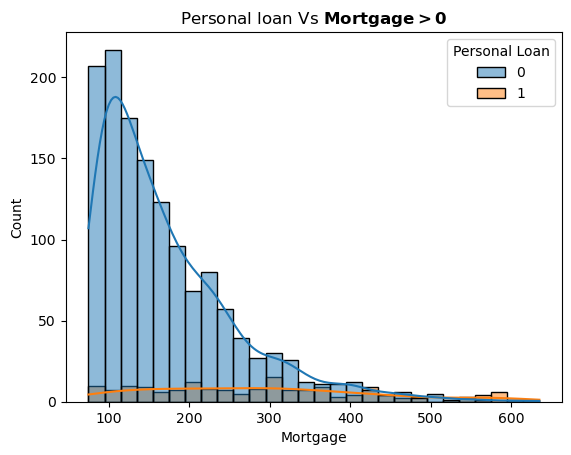

In [35]:
fig = plt.figure(figsize = (15,10),constrained_layout = True, dpi=100)
GridSpec = gridspec.GridSpec(ncols=1, nrows=2, figure= fig)
 
subfigure = fig.add_subfigure(GridSpec[0,:])
# Adding subplots to subfigure 
subplots = subfigure.subplots(1,2)

total_names=[["Customers' \nincome <= 8", "Customers' \nincome > 8"],["Mortgage = 0", "Mortgage > 0"]]
total_size=[[3788,1212],[3462,1538]]
sub_names=["Personal\n Loan = 1","Personal\n Loan = 0","Personal\n Loan = 1","Personal\n Loan = 0"]
sub_size=[[42,3746,438,774],[312,3150,168,1370]]

# Create colors
c1, c2, c3, c4=[plt.cm.Purples, plt.cm.Greens, plt.cm.Blues, plt.cm.Oranges]
colors = [[c1(0.8), c2(0.8)] ,[c1(0.6), c1(0.4), c2(0.6), c2(0.4)],[c3(0.8), c4(0.8)],[c3(0.6), c3(0.4), c4(0.6), c4(0.4)]]

for i,col in enumerate(['Income','Mortgage']):
    subplots[i].axis('equal')
    pie1, _ = subplots[i].pie(total_size[i], radius=0.8, labels=total_names[i],textprops={'fontsize': 15},
                              colors= colors[i*2])
    plt.setp( pie1, width=0.3, edgecolor='white')
    # Second Ring (Inside)
    pie2, _ = subplots[i].pie(sub_size[i], radius=0.85-0.3, 
    labels=sub_names, labeldistance=0.7,textprops={'fontsize': 14}, colors=colors[i*2+1])
    plt.setp( pie2, width=0.25, edgecolor='white')
    plt.margins(0,0)
    subplots[i].set_title(f'$\\mathbf{{{col}}}$ Vs Personal Loan',fontsize=18)
    
plt.show()
#############################################################################
print('\n')
print('*'*120)

sns.histplot(x=df[df['Mortgage']>0]['Mortgage'],hue = df['Personal Loan'],kde=True)
plt.title(f'Personal loan Vs $\\mathbf{{{"Mortgage>0"}}}$')

plt.show()

 - As seen in the pieplot of Income vs. Personal Loan, most customers have a low income <= 8 (about 74.52% of all customers), and among these low-income customers (0.91%) were granted loans but others (99.09%) were not. Also, in customers with income > 8 (about 25.48% of all customers), 35% were granted loans, and the other 65% were not. So, it means more income can increase the chance of being granted loans.
    - As seen in the histplot and pieplot of Mortgage, most customers didn't have any mortgage(Mortgage = 0, about 69.24% of all customers) that 9.01% of these customers were granted loans and 90.99% were not. It means that for being granted loans, Mortgage is not neccessary but is helpful. Also, it shows the importance of other features besides this feature. the rest of customers(30.76% of all customers) have Mortgage >= 75, 10.92% of these customers were granted loans and other 89.08% were not. So, these percentages show that the larger value of a mortage can increase the chance of being granted loans. 

<Figure size 800x500 with 0 Axes>

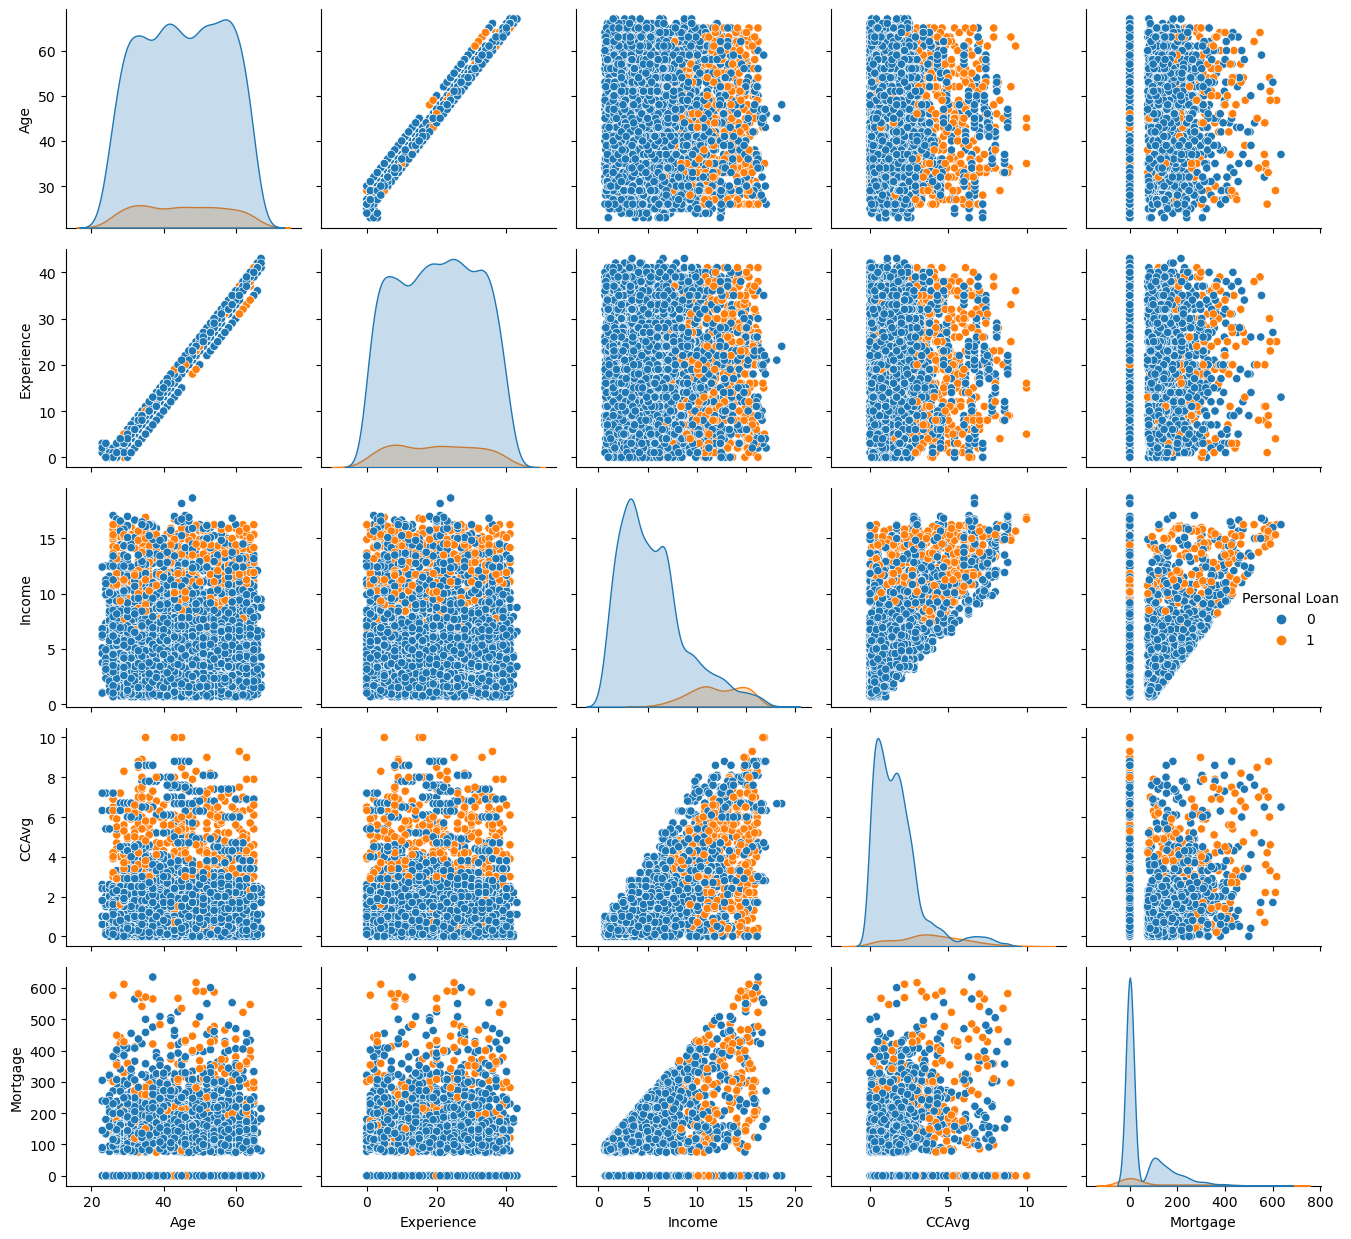

*****************************************************************************************************************************


In [36]:
plt.figure(figsize=(8,5))
sns.pairplot(df[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']],hue='Personal Loan')
plt.tight_layout()
plt.show()
print('*'*125)

### Pairplots of continuous features
    - Age : As seen above in the Age-Age plot, customers of any age can be granted loans.
    
    - The Experience-Age plot shows that by increasing the age, experience increases, and vice versa.
    
          - The Income-Age plot shows that customers have different incomes at different ages, and income is 
          not dependent on age, and vice versa, but we see that by increasing income at any age, the chance 
          of being granted loans increases.
          
          - The CCAvg-Age plot shows that customers have different CCAvg values at any age, almost from 25 
          (Age). By increasing the CCAvg, the chance of being granted loans increases.
          
          - The Mortgage-Age shows that mortgage is not dependent on age; it also shows that by increasing the mortgage the chance of being granted loans increases.
         
    - Experience : As seen above in the Experience-Experience plot, customers with any Experience can be 
    granted loans.
    
          - The Experience-Income plot shows that customers with any experience can have different incomes 
          (low or high), and it also shows that by increasing the income, the chance of being granted loans 
          increases.
          
          - The Experience-CCAvg plot also shows that the experience and the CCAvg are not dependent 
          together, and it shows that increasing CCAvge leads to increase the chance of being granted loans.
          
    - Income : As seen above in the income-income plot, the chance of being granted loans is higher for high-
    income customers than low-income customers.
    
          - The CCAvg-Income plot shows that by increasing income, CCAvg can increase, so by increasing each 
          of them, the chance of being granted loans increases.
          
          - The Mortgage-Income plot shows that by increasing income, Mortgage can increase, so by increasing 
          each of them, the chance of being granted loans increases.
          
          
    - Mortgage-Mortgage plot shows that the number of customers that have a mortgage of 0(customers without mortgage) is greater than the number of customers with a mortgage > 0 , but the ratio of granted loans 
    (number of customers granted loans/number of customers) in a mortgage > 0 is greater.(ratio of granted 
    loans in mortgage = 0 is 9.01% , ratio of granted loans in mortgage > 0 is 10.92%)
    
    
    - CCAvg-CCAvg plot shows that the number of customers with CCAvg<=3 is greater than the number of them 
    with CCAvg >3, but the ratio of granted loans in CCAvg > 3 is greater than ratio in CCAvg <= 3(ratio of 
    granted loans in CCAvg <= 3 is 4.023%, ratio of granted loans in CCAvg > 3 is 36.87%)
    
    
    - Income-Income plot shows that the number of customers with lower incom (Income <= 8) is greater than 
    the number of them with high income (Income > 8), but the ratio of granted loans in Income > 8 is greater 
    than ratio in Income <=8 (ratio of granted loans in Income <= 8 is 0.91%, ratio of granted loans in 
    Income > 8 is 35%)

Personal Loan    Income     CCAvg  Mortgage
Personal Loan       1.000000  0.502462  0.366889  0.142095
Income              0.502462  1.000000  0.645984  0.206806
CCAvg               0.366889  0.645984  1.000000  0.109905
Mortgage            0.142095  0.206806  0.109905  1.000000

Income     CCAvg  Mortgage
Income    1.000000  0.645984  0.206806
CCAvg     0.645984  1.000000  0.109905
Mortgage  0.206806  0.109905  1.000000

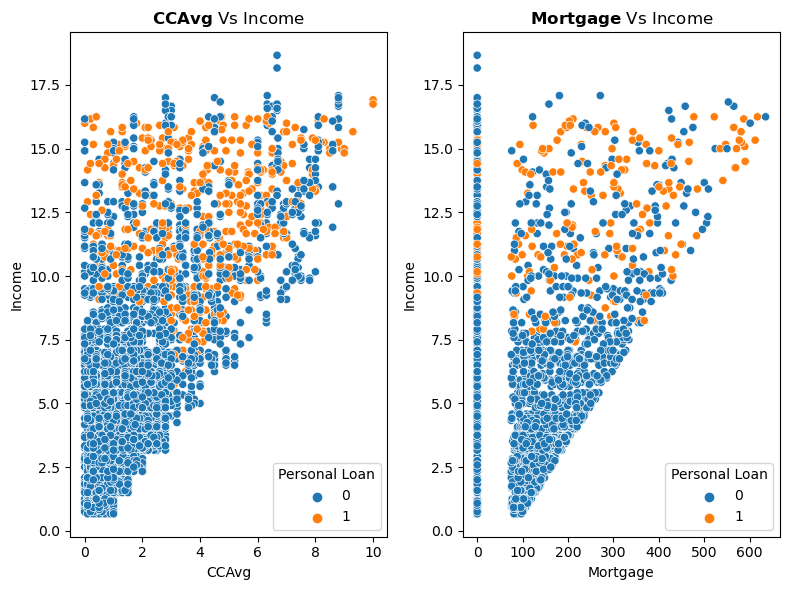

In [37]:
display(df[['Personal Loan','Income','CCAvg','Mortgage']].corr())
display(df[['Income','CCAvg','Mortgage']].corr())


plt.figure(figsize=(8,6))
for i,col in enumerate(['CCAvg','Mortgage']):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=df, x=col,y='Income',hue='Personal Loan')
    plt.title(f"$\\mathbf{{{col}}}$ Vs Income")
plt.tight_layout()
plt.show()

## Dependency between continuous features and the target
### Income-Personal_Loan, CCAvg-Personal_Loan, Mortgage-Personal_Loan
    - By increasing each of Income, CCAvg and Mortgage the chance of being granted loans can increase.
## Dependency between continuous features
### Mortgage-Income, CCAvg-Income
    -By increasing Income, Mortgage and CCAvg can increase the cahnces ofgetting loan

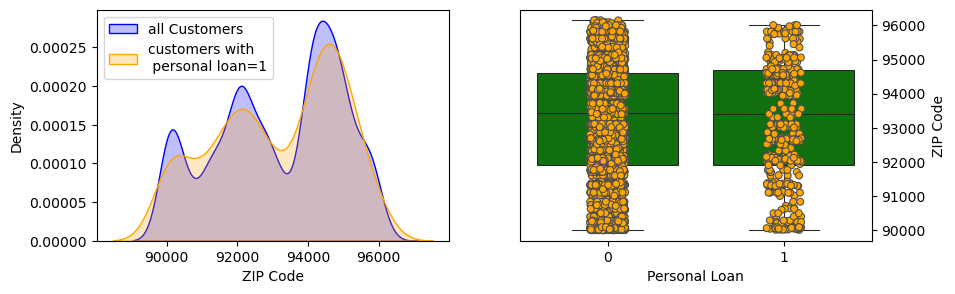

In [38]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.kdeplot(df1['ZIP Code'],fill=True,color='blue',label='all Customers')
sns.kdeplot(df1[df1['Personal Loan']==1]['ZIP Code'],fill=True,color='orange',label='customers with\n personal loan=1')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
ax = sns.boxplot(y=df1['ZIP Code'],x=df1['Personal Loan'],color="green", linewidth=0.75)
ax = sns.stripplot(y=df1['ZIP Code'],x=df1['Personal Loan'],color="orange",linewidth=0.75)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

 - As shown in these plots, the number (or distribution) of customers who are granted loans in various locations (different zipcodes) is proportional to the number (or distribution) of all customers in those locations. Also, we see that customers in different locations can be granted loans.

## 4. Machine Learning

- Normalization
We defined a function named Normalization for normalizing data. We used MinMaxScalar in this function. 

In [39]:
def Normalization(df,lst,rng) :
    ''' inputs
    df : the data frame that should be normal
    lst : list of columns of df that should be normal
    rng : the range of normalization 
    
        output
    df : normalized df_in  '''
    
    scaler = preprocessing.MinMaxScaler(feature_range = rng)
    df[lst] = scaler.fit_transform(df[lst])
    return df

### Four functions for different classification algorithms and their evaluation

## Logistic Regression Model

In [40]:
def LogReg(x,y,test_size,stratify) :
    ## Fist x and y split for train and test,then model is created and fit
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=0,stratify=stratify)
    Model = LogisticRegression(solver='liblinear')
    Model.fit(x_train,y_train.ravel())
    ## report of model evaluation is printed
    print('Accuracy of Logistic Regression Model: ' , np.round(metrics.accuracy_score(y_test,Model.predict(x_test)),3))
    Evaluation(Model,x,y,x_train,y_train,x_test,y_test)
    print('*'*120)

## Naive Bayes Model

In [41]:
def NaiveBayes(x,y,test_size,model,stratify) : ## Nive Bayes have 4 algorithms,The function takes it as an argument.  
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=0,stratify=stratify)
    Model = model()
    Model.fit(x_train,y_train.ravel())
    print('Accuracy of Model: ' , np.round(metrics.accuracy_score(y_test,Model.predict(x_test)),3))
    Evaluation(Model,x,y,x_train,y_train,x_test,y_test)
    print('*'*120)

## KNN Model

In [42]:
def KNN(x,y,test_size,k,stratify) :
    ## The function takes k as argument, these lists stores scores of k iterations of running knn algorithms
    train_score = []
    test_score = []
    best_k = 0
    best_score = 0
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=0,stratify=stratify)
    
    for i in range (1,k+1) :
        Model = KNeighborsClassifier(i)
        Model.fit(x_train,y_train.ravel())
        train_score.append(np.round(Model.score(x_train,y_train),3))
        test_score.append(np.round(Model.score(x_test,y_test),3))
        
    best_k = test_score.index(max(test_score))+1
    best_score = max(test_score)
    Model = KNeighborsClassifier(best_k)
    Model.fit(x_train,y_train.ravel())
    
    print('Model accuracy for k = %d : '%k , np.round(test_score,3))
    print('The best result is for k = %d with accuracy = %s .'%(best_k,best_score))
    Evaluation(Model,x,y,x_train,y_train,x_test,y_test)
    
    plt.plot(range(1,k+1),train_score,color='darkblue',label='train_accuracy')
    plt.plot(range(1,k+1),test_score,color='darkorange',label='test_accuracy')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    print('*'*120)

## Test 1) Create and Evaluate Models on normalized data ( just 5 features ) 

In [43]:
def Evaluation(Model,x,y,x_train,y_train,x_test,y_test) :
    cv_score = (cross_val_score(Model, x_train, y_train.ravel(), cv = StratifiedKFold(10), scoring='accuracy')).mean()
    print('Train score : ',np.round(Model.score(x_train,y_train),3))
    print('Average Cross Validation Score : ',np.round(cv_score,3))
    print('jaccard_score : ',np.round(jaccard_score(y_test,Model.predict(x_test)),3))
    print('precision_score : ',np.round(precision_score(y_test,Model.predict(x_test)),3))
    print('recall_score : ',np.round(recall_score(y_test,Model.predict(x_test)),3))
    print('f1_score : ',np.round(f1_score(y_test,Model.predict(x_test)),3))
    print('Result of confusion matrix : ')
    print(confusion_matrix(y_test,Model.predict(x_test)))

Accuracy of Logistic Regression Model:  0.958
Train score :  0.947
Average Cross Validation Score :  0.946
jaccard_score :  0.512
precision_score :  0.957
recall_score :  0.524
f1_score :  0.677
Result of confusion matrix : 
[[457   1]
 [ 20  22]]
************************************************************************************************************************
Result of Gaussian Model : 
Accuracy of Model:  0.888
Train score :  0.886
Average Cross Validation Score :  0.886
jaccard_score :  0.273
precision_score :  0.375
recall_score :  0.5
f1_score :  0.429
Result of confusion matrix : 
[[423  35]
 [ 21  21]]
************************************************************************************************************************
Result of Complement Model : 
Accuracy of Model:  0.62
Train score :  0.617
Average Cross Validation Score :  0.616
jaccard_score :  0.128
precision_score :  0.137
recall_score :  0.667
f1_score :  0.228
Result of confusion matrix : 
[[282 176]
 [ 14  28]]

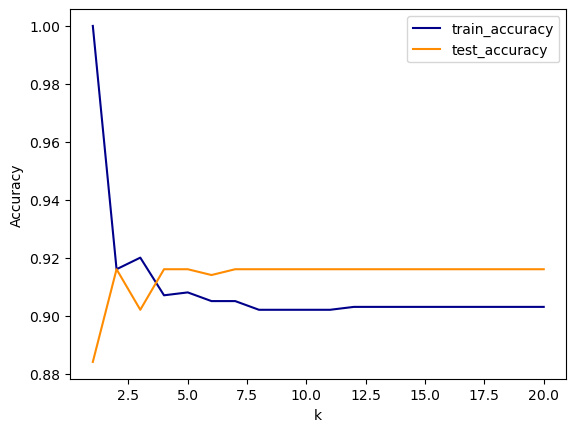

************************************************************************************************************************


In [44]:
#################### df normalization ######################
df_Normal1 = df.copy()
features1 = ['Age','Experience','Income','CCAvg','Mortgage']
df_Normal1 = Normalization(df_Normal1,features1,(1,5))
#################### x,y ##############################
x = df_Normal1.drop('Personal Loan',axis=1)
y = df_Normal1['Personal Loan'].values.reshape(-1,1)
###########################################################
## Logistic Regression
LogReg(x,y,0.1,None)

## NaiveBayes
print('Result of Gaussian Model : ')
NaiveBayes(x,y,0.1,GaussianNB,None)
print('Result of Complement Model : ')
NaiveBayes(x,y,0.1,ComplementNB,None)
print('Result of Multinomial Model : ')
NaiveBayes(x,y,0.1,MultinomialNB,None)
print('Result of Bernoulli Model : ')
NaiveBayes(x,y,0.1,BernoulliNB,None)

## KNN
print('Result of KNN Model : ')
KNN(x,y,0.1,20,stratify=None)

## Description of results
### Note :
#### TP = True Positive => Actual(y_test) = 1 , Predicted = 1 
#### TN = True Negative => Actual(y_test) = 0 , Predicted = 0
#### FP = False Positive => Actual(y_test) = 0 , Predicted = 1 
#### FN = True Negative => Actual(y_test) = 1 , Predicted = 0 
    - Cross-validation was done in 10 folds; scores were close together in the folds, and as seen in reports, the results didn't improve models.
    - Knn model is the best model and after that LogisticRegression is the model with good results.
    - As shown on the plot of train_accuracy and test_accuracy related to Knn model, train accuracy is 1 in k = 1 and decreases by increasing k; test accuracy is changing in range (0.956–0.972); and the best score is 0.972 in k = 3, so there is just a 0.007 difference with train accuracy.
    - knn is the best in all of evaluation metrics.
    - In classification models, the confusion matrix is really important besides accuracy and scores. TP and FN are so important in this dataset because the bank wants to give loans to those who can be granted them, and if our model predicts many FN, the bank will lose. as seen above, Knn has the best results in the confusion matrix. Tp = 28, TN = 458, FP = 0, FN = 14. 

## Test 2) Create and Evaluate 6 Models on normalized data (  just 5 features ) with stratify 
    - Because we deal with an imbalance dataset in target, we set 'stratify' parameter in 'train_test_split' to 'y' we use stratified sampling here to ensure that the train and test data have the same proportion of class labels.

Accuracy of Logistic Regression Model:  0.934
Train score :  0.947
Average Cross Validation Score :  0.945
jaccard_score :  0.389
precision_score :  0.778
recall_score :  0.438
f1_score :  0.56
Result of confusion matrix : 
[[446   6]
 [ 27  21]]
************************************************************************************************************************
Result of Gaussian Model : 
Accuracy of Model:  0.892
Train score :  0.884
Average Cross Validation Score :  0.885
jaccard_score :  0.341
precision_score :  0.452
recall_score :  0.583
f1_score :  0.509
Result of confusion matrix : 
[[418  34]
 [ 20  28]]
************************************************************************************************************************
Result of Complement Model : 
Accuracy of Model:  0.63
Train score :  0.616
Average Cross Validation Score :  0.615
jaccard_score :  0.151
precision_score :  0.163
recall_score :  0.688
f1_score :  0.263
Result of confusion matrix : 
[[282 170]
 [ 15  33]

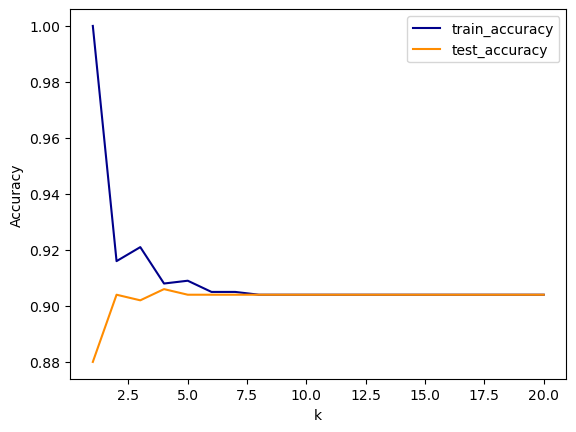

************************************************************************************************************************


In [57]:
#################### x,y ##############################
x = df_Normal1.drop('Personal Loan',axis=1)
y = df_Normal1['Personal Loan'].values.reshape(-1,1)
###########################################################
## Logistic Regression
LogReg(x,y,0.1,y)

## NaiveBayes
print('Result of Gaussian Model : ')
NaiveBayes(x,y,0.1,GaussianNB,y)
print('Result of Complement Model : ')
NaiveBayes(x,y,0.1,ComplementNB,y)
print('Result of Multinomial Model : ')
NaiveBayes(x,y,0.1,MultinomialNB,y)
print('Result of Bernoulli Model : ')
NaiveBayes(x,y,0.1,BernoulliNB,y)

## KNN
print('Result of KNN Model : ')
KNN(x,y,0.1,20,stratify=y)

### Description of results
    - Knn model is the best model with good results again. 
    - test accuracy is changing in range (0.94–0.97); and the best score is 0.97 in k = 1, so there is just a 0.03 difference with train accuracy.
    - The difference between result of this model and previous model is in confusion matrix result that is really important. TP in this model is 35 that is greater than previous TP(28) and FN is 13 that is smaller than previous FN(14).

## Test 3) create and evaluate 6 Models on normalized data ( all features ) with stratify 

Accuracy of Logistic Regression Model:  0.942
Train score :  0.949
Average Cross Validation Score :  0.947
jaccard_score :  0.463
precision_score :  0.806
recall_score :  0.521
f1_score :  0.633
Result of confusion matrix : 
[[446   6]
 [ 23  25]]
************************************************************************************************************************
Result of Gaussian Model : 
Accuracy of Model:  0.888
Train score :  0.883
Average Cross Validation Score :  0.883
jaccard_score :  0.333
precision_score :  0.438
recall_score :  0.583
f1_score :  0.5
Result of confusion matrix : 
[[416  36]
 [ 20  28]]
************************************************************************************************************************
Result of Complement Model : 
Accuracy of Model:  0.622
Train score :  0.602
Average Cross Validation Score :  0.602
jaccard_score :  0.149
precision_score :  0.159
recall_score :  0.688
f1_score :  0.259
Result of confusion matrix : 
[[278 174]
 [ 15  33]

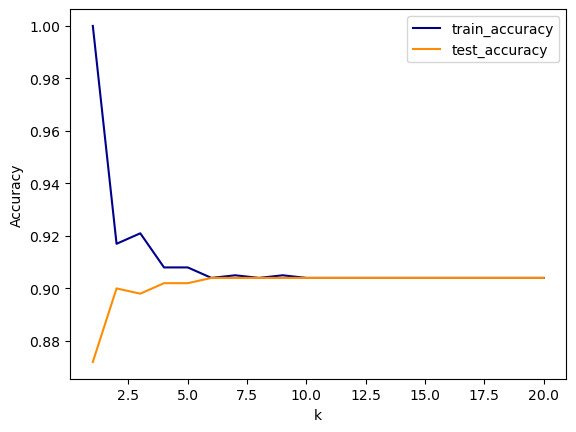

************************************************************************************************************************


In [56]:
#################### df normalization ######################
df_Normal2 = df.copy()
features2 = ['Age','Experience','Income','Family',
           'CCAvg','Education','Mortgage','Securities Account','CD Account','Online'
           ,'CreditCard']
df_Normal2 = Normalization(df_Normal2,features2,(1,5))
#################### x,y ##############################
x = df_Normal2.drop('Personal Loan',axis=1)
y = df_Normal2['Personal Loan'].values.reshape(-1,1)
###########################################################
## Logistic Regression
LogReg(x,y,0.1,y)

## NaiveBayes
print('Result of Gaussian Model : ')
NaiveBayes(x,y,0.1,GaussianNB,y)
print('Result of Complement Model : ')
NaiveBayes(x,y,0.1,ComplementNB,y)
print('Result of Multinomial Model : ')
NaiveBayes(x,y,0.1,MultinomialNB,y)
print('Result of Bernoulli Model : ')
NaiveBayes(x,y,0.1,BernoulliNB,y)

## KNN
print('Result of KNN Model : ')
KNN(x,y,0.1,20,stratify=y)

### Description of results
    - We normalized all features, created and evaluated 6 models. As we see Knn is the best again. Reports of Knn model shows that the number of FN decreased and the number of TP increased. FN = 11, TP = 37. Also accuracy is 0.974 and f1_score is 0.851. We consider this model as the final model.

# Final Model
## The best Model is KNN for this dataset with Accuracy = 0.974 and f1-score = 0.851

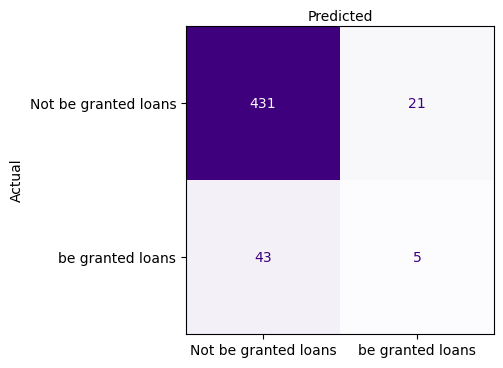

In [55]:
x = df_Normal2.drop('Personal Loan',axis=1).values
y = df_Normal2['Personal Loan'].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0,stratify=y)

k = 1
Model = KNeighborsClassifier(k)
Model.fit(x_train,y_train.ravel())
y_pred = Model.predict(x_test)


fig, ax = plt.subplots(figsize=(4, 4))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels = ['Not be granted loans', 'be granted loans'])
cm_display.plot(ax=ax,colorbar=False, cmap='Purples')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.xaxis.set_label_position('top')
plt.show()

### Convert train data, test data and predicted data to data frame just for visualization

In [58]:
df_train = pd.DataFrame(x_train,columns=['Age','Experience','Income','Family','CCAvg','Education','Mortgage',
                                         'Securities Account','CD Account','Online','CreditCard'])
df_train.insert(11,'Personal Loan',y_train)

df_test = pd.DataFrame(x_test,columns=['Age','Experience','Income','Family','CCAvg','Education','Mortgage',
                                         'Securities Account','CD Account','Online','CreditCard'])
df_test.insert(11,'Personal Loan',y_test)

df_pred = pd.DataFrame(x_test,columns=['Age','Experience','Income','Family','CCAvg','Education','Mortgage',
                                         'Securities Account','CD Account','Online','CreditCard'])
df_pred.insert(11,'Personal Loan',y_pred)

ValueError: Shape of passed values is (4500, 12), indices imply (4500, 11)

NameError: name 'df_train' is not defined

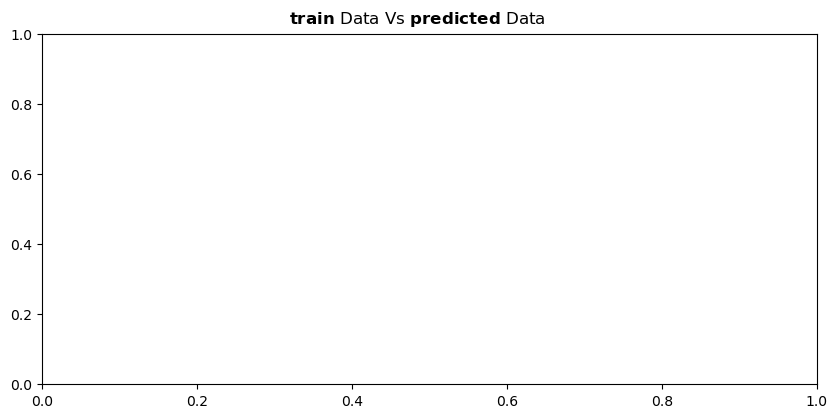

In [52]:
fig = plt.figure(figsize=(10,10))
fig.suptitle(f'$\\mathbf{{{"train"}}}$ Data Vs $\\mathbf{{{"predicted"}}}$ Data',y=0.905)
for i,feature in enumerate(['CCAvg','Mortgage']) :
    plt.subplot(2,1,i+1)
    sns.scatterplot(data=df_train, x=feature,y='Income',hue='Personal Loan')
    sns.scatterplot(data=df_pred, x=feature,y='Income',hue='Personal Loan',palette = ['Green','Red'])

plt.show()

    As shown in the two plots above, blue and orange points are personal loans of train data, and green and red points are predicted data. The plots show that predicted points are in the same range as train points and are not outliers; they also show that red points are predicted for higher incomes and green points are predicted for lower incomes. (As seen before, by increasing income, the chance of being granted loans increases, so personal loan = 1)

NameError: name 'df_test' is not defined

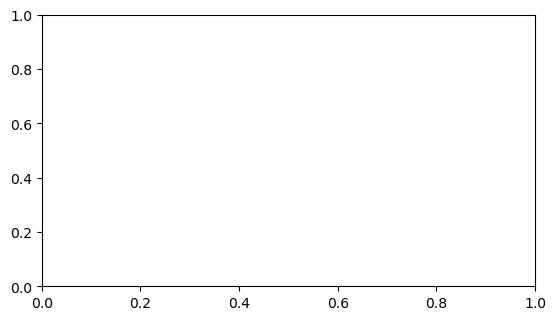

In [51]:
rows = 3
cols = 2
colors = [['darkblue','orange'],['Green','red'],['purple','crimson']]

for j,feature in enumerate(['CCAvg','Mortgage','Education']) :
    plt.figure(figsize=(14,12))
    plt.subplot(rows,cols,j*2+1)
    sns.scatterplot(data=df_test, x=feature,y='Income',hue='Personal Loan',palette = colors[j])
    plt.title(f'$\\mathbf{{{"Actual"}}}$ Data')
    if j == 2 :
        plt.legend([],[], frameon=False)
    plt.subplot(rows,cols,j*2+2)
    sns.scatterplot(data=df_pred, x=feature,y='Income',hue='Personal Loan',palette = colors[j])
    plt.title(f'$\\mathbf{{{"predicted"}}}$ Data')
    if j == 2 :
        plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.show()

    - As seen in the above plots, actual data and predicted data for four features are shown. Plots in each row are different in some points' colors. It means that some points in the predicted plots were predicted incorrectly

In [50]:
fig = px.scatter_3d(df_test, x='CCAvg', y='Income', z='CD Account',
              color='Personal Loan')

fig.update_layout(
 annotations=[
        dict(
            x=0.47,
            y=0.78,
            
            text="Actual Value",
            textangle=0,
            ax=-90,
            ay=0,
            font=dict(
                color="red",
                size=14
            ),
            arrowcolor="red",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),])

fig.show()

#######################################################################







fig = px.scatter_3d(df_pred, x='CCAvg', y='Income', z='CD Account',
              color='Personal Loan')
fig.update_layout(
 annotations=[
        dict(
            x=0.47,
            y=0.78,
            
            text="Incorrect Predicted Value",
            textangle=0,
            ax=-130,
            ay=0,
            font=dict(
                color="red",
                size=14
            ),
            arrowcolor="red",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1),])
fig.show()

NameError: name 'df_test' is not defined